In [1]:
from mylib import read_stats, plot_confidence_interval
import matplotlib.pyplot as plt
import numpy as np

In [19]:
BASE_DIR = "../simulations/results/"
# repeat = 10
# **.spawner.tl = exponential(10min)
# **.spawner.to = exponential(10min)
# **.spawner.tp = exponential(${60..6000 step 600}min)
# **.spawner.tn = exponential(30min)
tl = 10
to = 10
TP = range(60, 6000+1, 300)
tn = 30
REP = range(10)

stats = read_stats(BASE_DIR + "Parking-{}-#{}.sca.csv", TP, REP)
stats.keys()

dict_keys(['landQueueLen', 'landQueueTime', 'numParked', 'toffQueueLen', 'toffQueueTime'])

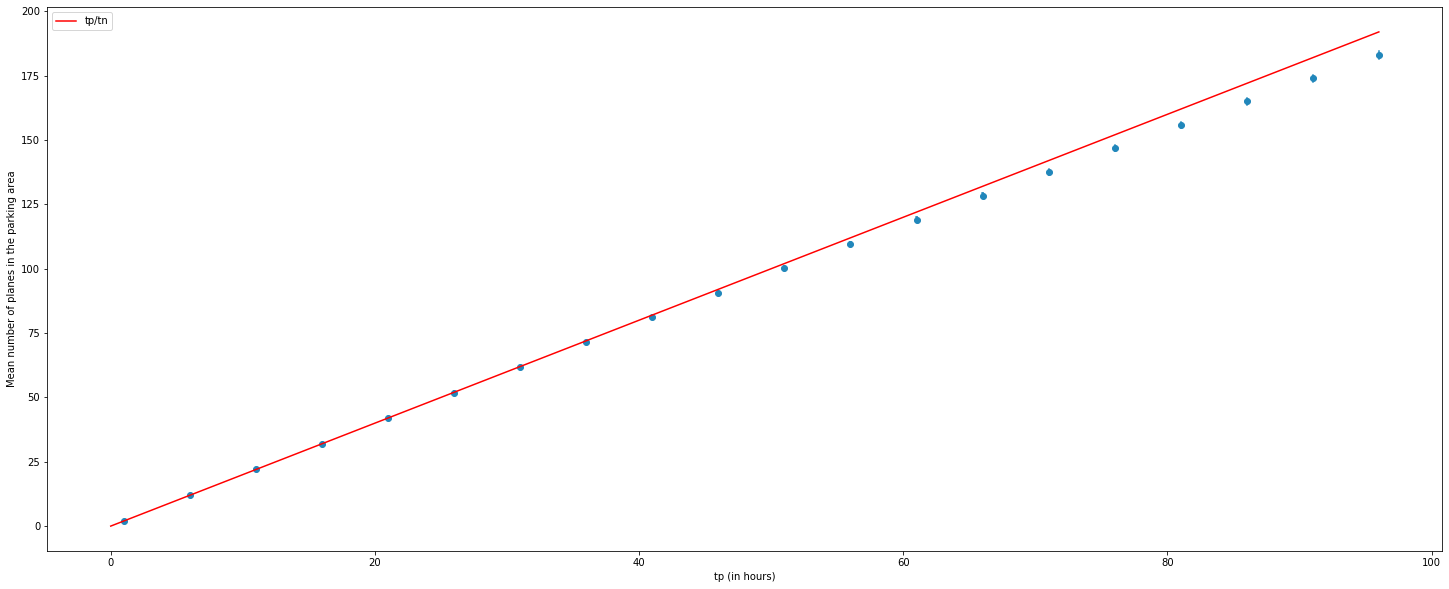

In [20]:
# show sum of queueLengths varing to/tn
plt.rcParams["figure.figsize"] = (25, 10)
park = stats["numParked"]
for tp in TP:
	v = [park[tp,rep].timeavg for rep in REP]
	plot_confidence_interval(tp/60, np.array(v))
tp = np.linspace(0, max(TP)/60, 100)
plt.plot(tp, tp*60/tn, color='r', label="tp/tn")
plt.ylabel("Mean number of planes in the parking area")
plt.xlabel("tp (in hours)")
plt.legend(loc="upper left")
plt.show()

No handles with labels found to put in legend.


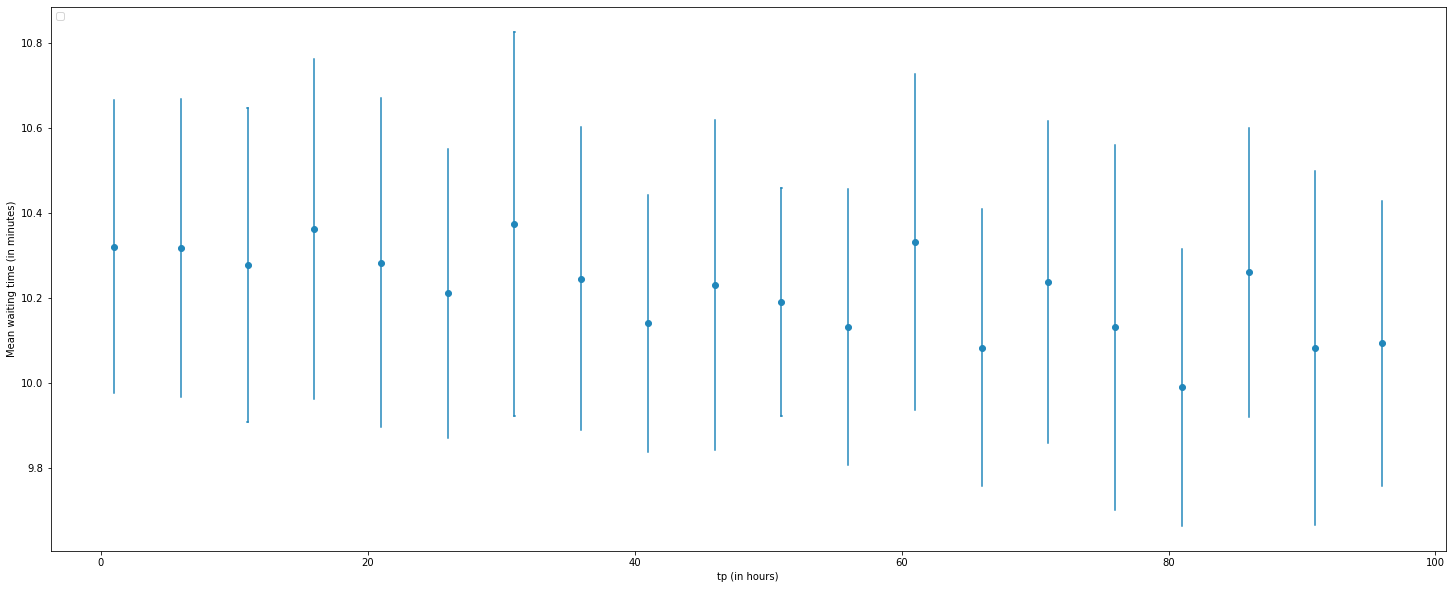

No handles with labels found to put in legend.


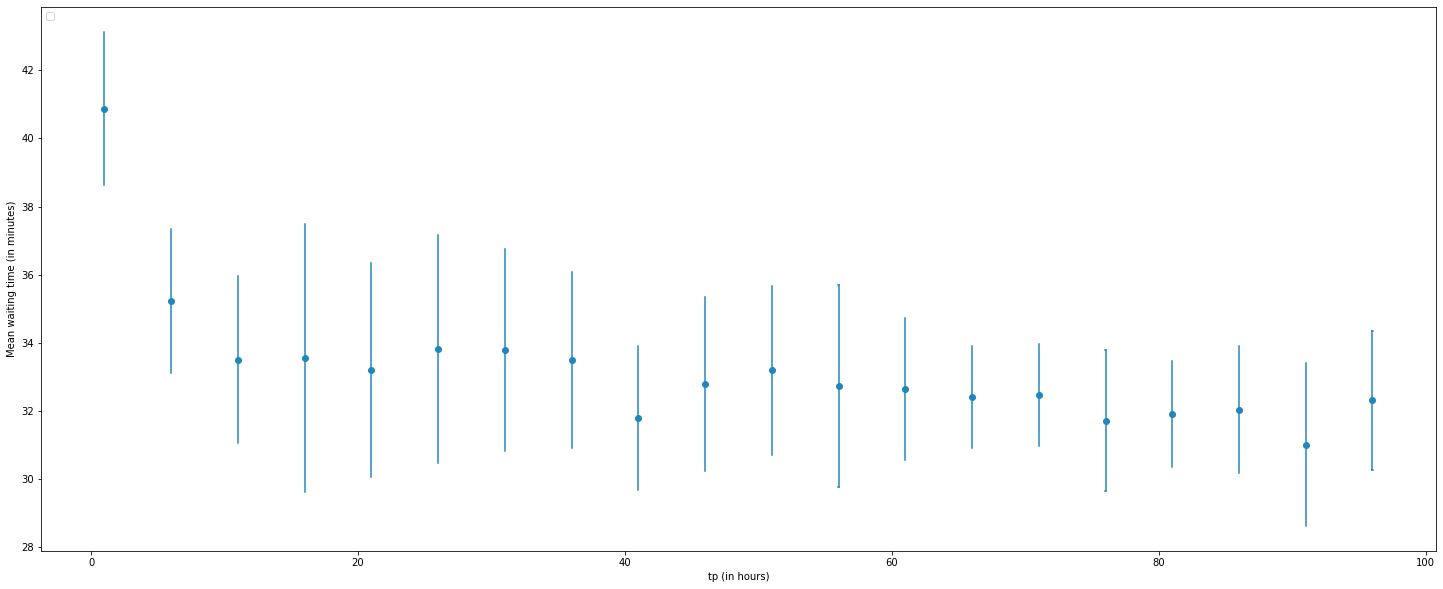

In [21]:
# show sum of queueLengths varing to/tn
plt.rcParams["figure.figsize"] = (25, 10)
for name in ["landQueueTime", "toffQueueTime"]:
	for tp in TP:
		v = [stats[name][tp,rep].mean for rep in REP]
		plot_confidence_interval(tp/60, np.array(v)/60)
	plt.ylabel("Mean waiting time (in minutes)")
	plt.xlabel("tp (in hours)")
	plt.legend(loc="upper left")
	plt.show()